# Regression with an Abalone Dataset

<img src="https://camanchaca.cl/en/wp-content/uploads/2020/07/Abalo%CC%81n-marino-a-la-parrilla.jpg" width="700">

**In this project**, the goal is to predict the age of abalones based on their physical measurements. The target variable is `Rings`, which correlates with the abalone’s age (approximately `Rings + 1.5 years`). The dataset was obtained from a Kaggle Playground Series competition.

**Physical Attributes :**
- `Sex`: Male / Female / Infant  
- `Length`: Longest shell measurement  
- `Diameter`: Diameter of the abalone  
- `Height`: Height of the abalone  
- `WholeWeight`: Weight of the whole abalone  
- `ShuckedWeight`: Meat weight  
- `VisceraWeight`: Gut weight (internal organs)  
- `ShellWeight`: Shell weight after drying  
- `Rings`: Number of rings (+1.5 ≈ Age in years)  

The dataset was taken from Kaggle:  
[Kaggle | Regression with an Abalone Dataset](https://www.kaggle.com/competitions/playground-series-s4e4/data)


## Data Read 

In [1]:
import pandas as pd

import warnings 
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train["is_train"] = 1
test["is_train"] = 0
# Veriyi daha sonra ayırabillmek için işaret kolonları ekliyoruz . 

In [4]:
test["Rings"] = -1   # placeholder, modelde kullanılmayacak  
# Amac conctat sıraısnda hata olmasın 

In [5]:
df = pd.concat([train, test], axis=0)

## EDA - Exploratory Data Analysis

In [6]:
df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,is_train
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,1
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,1
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,1
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,1
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,1


In [7]:
df.tail()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,is_train
60406,151021,I,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500,-1,0
60407,151022,F,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050,-1,0
60408,151023,I,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650,-1,0
60409,151024,F,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350,-1,0
60410,151025,F,0.430,0.340,0.120,0.4150,0.1525,0.0910,0.0905,-1,0


In [8]:
df.sample(5)

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,is_train
10434,101049,F,0.425,0.340,0.12,0.5725,0.2310,0.1220,0.1405,-1,0
30185,30185,I,0.495,0.400,0.14,0.7700,0.2370,0.1455,0.2200,9,1
5371,95986,M,0.595,0.475,0.16,1.0475,0.5255,0.2105,0.2700,-1,0
23204,23204,F,0.665,0.515,0.17,1.5140,0.5450,0.3575,0.6350,21,1
52592,52592,M,0.605,0.475,0.16,1.1155,0.5775,0.2570,0.2740,10,1


In [9]:
test_id = test['id']

In [10]:
df.drop(columns=["id"],inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151026 entries, 0 to 60410
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Sex             151026 non-null  object 
 1   Length          151026 non-null  float64
 2   Diameter        151026 non-null  float64
 3   Height          151026 non-null  float64
 4   Whole weight    151026 non-null  float64
 5   Whole weight.1  151026 non-null  float64
 6   Whole weight.2  151026 non-null  float64
 7   Shell weight    151026 non-null  float64
 8   Rings           151026 non-null  int64  
 9   is_train        151026 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.7+ MB


In [12]:
df.shape

(151026, 10)

In [13]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
is_train          0
dtype: int64

In [14]:
df.describe()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,is_train
count,151026.000000,151026.000000,151026.000000,151026.000000,151026.000000,151026.000000,151026.000000,151026.000000,151026.000000
mean,0.517230,0.401792,0.135579,0.789446,0.340958,0.169421,0.225989,5.418034,0.599996
std,0.117974,0.097804,0.038075,0.457637,0.204345,0.100833,0.130052,5.789160,0.489900
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,-1.000000,0.000000
25%,0.445000,0.345000,0.110000,0.419500,0.177500,0.086500,0.120000,-1.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.329500,0.166000,0.225000,7.000000,1.000000
75%,0.600000,0.470000,0.160000,1.068000,0.463500,0.232500,0.305000,10.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

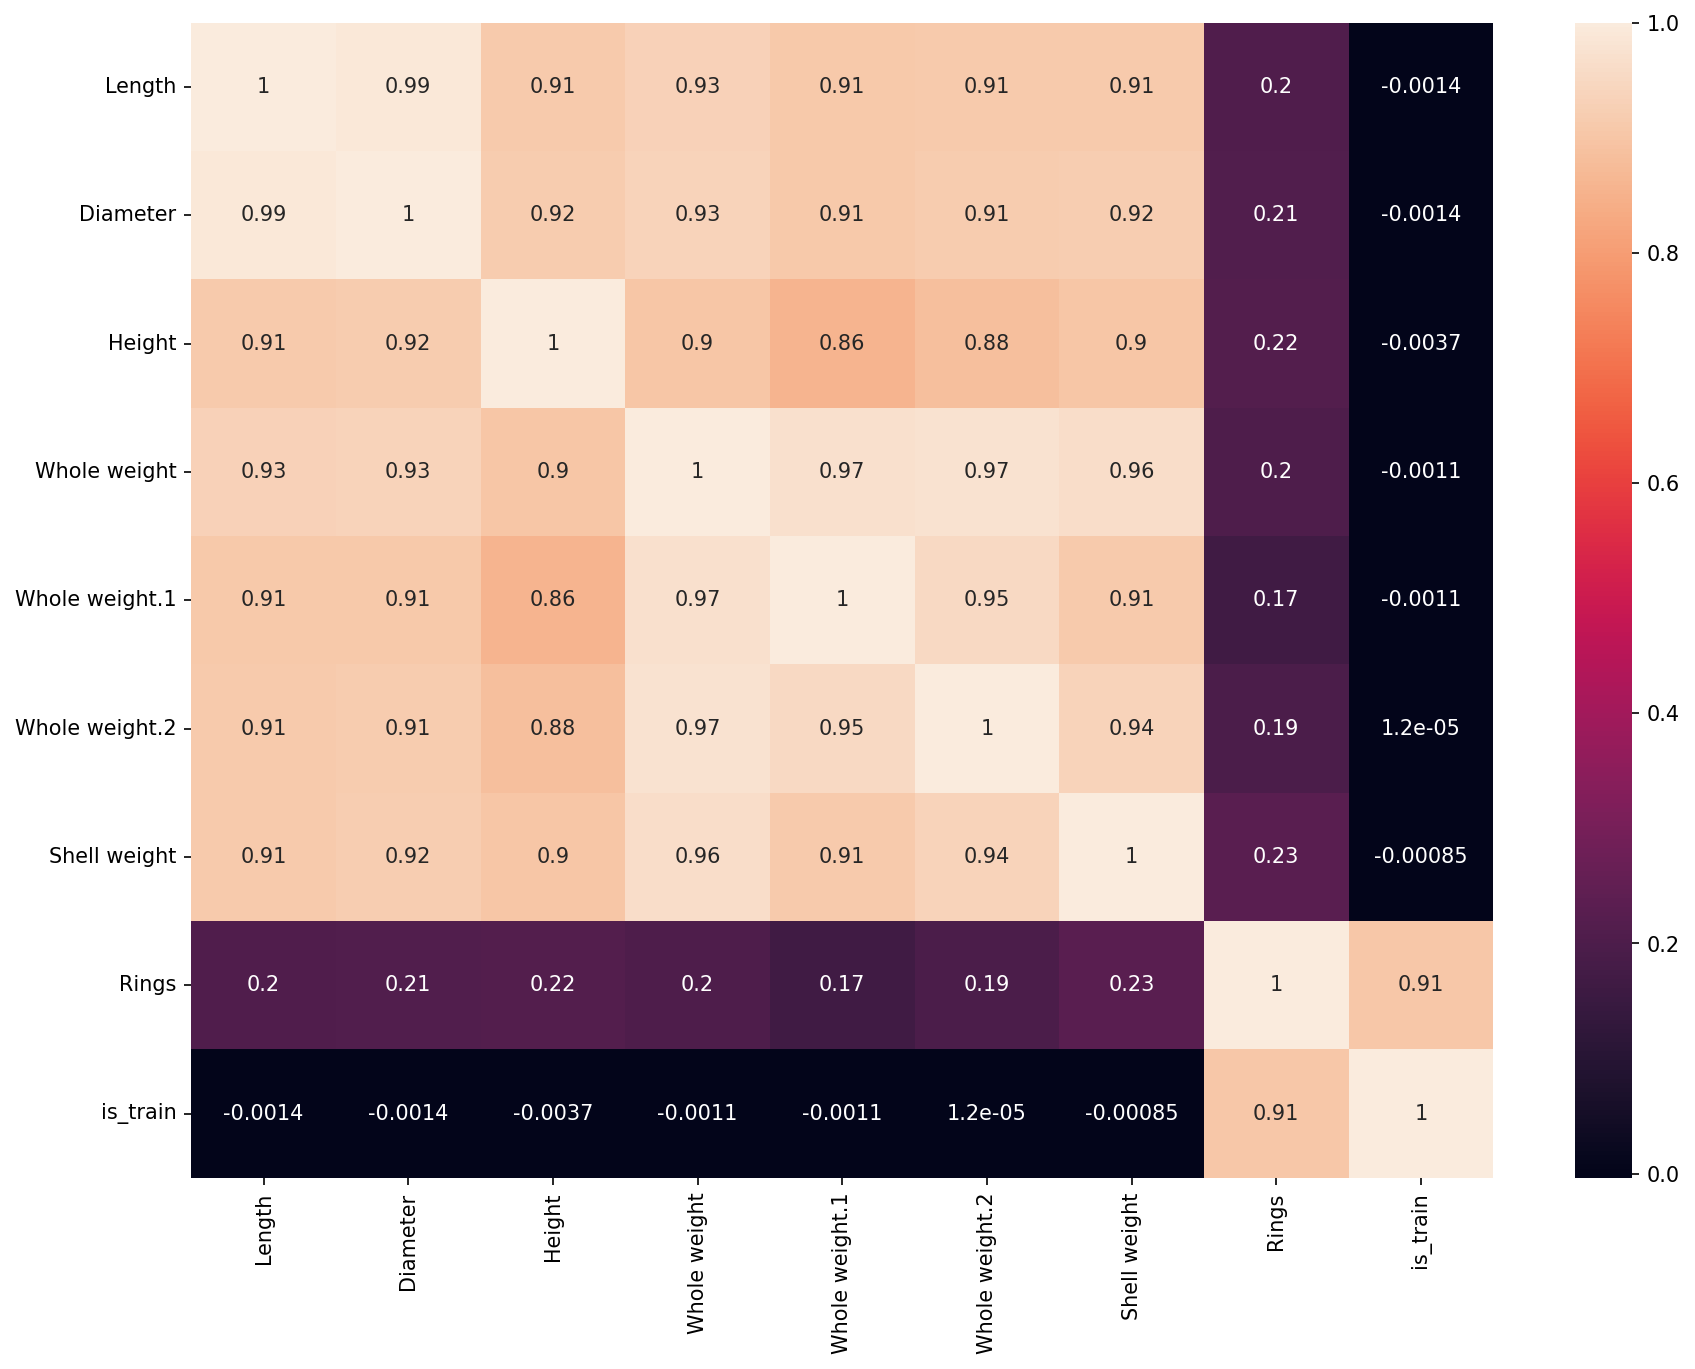

In [16]:
plt.figure(figsize=(14,10), dpi=150)
sns.heatmap(df.corr(numeric_only=True), annot=True)

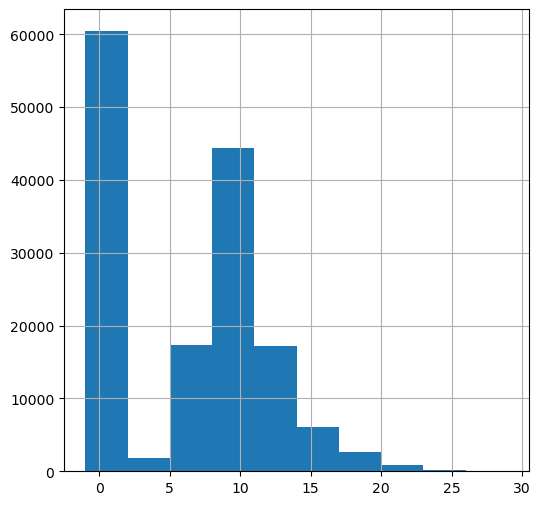

In [17]:
df["Rings"].hist(figsize=(6,6));

In [18]:
numeric_cols = df.select_dtypes(include="number").columns

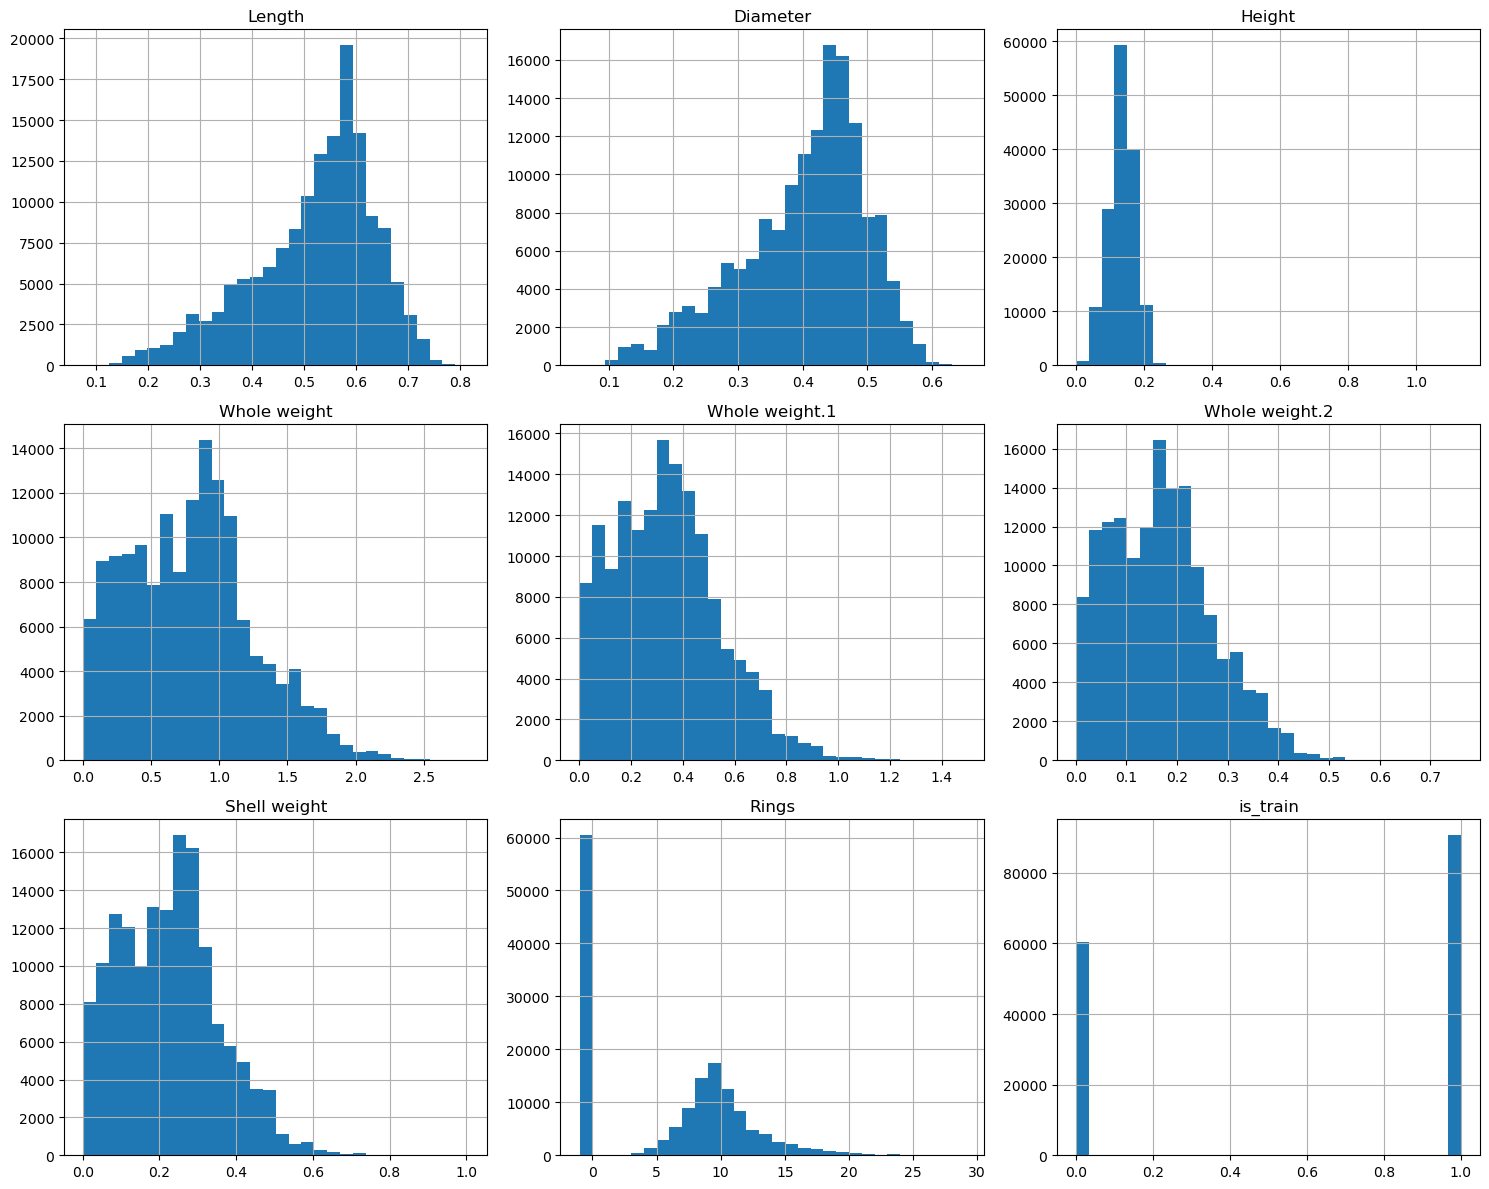

In [19]:
df[numeric_cols].hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

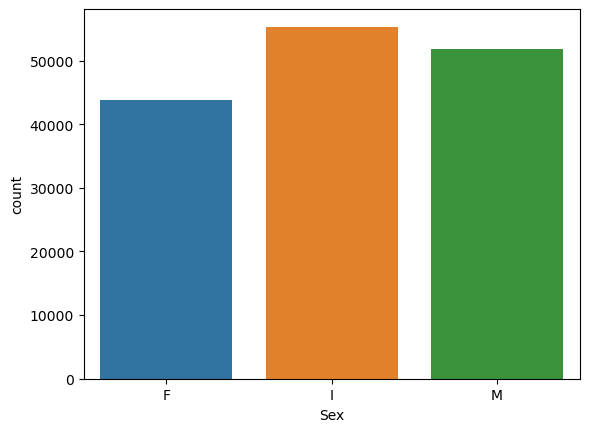

In [20]:
sns.countplot(x=df['Sex'],hue=df['Sex']);

<Axes: xlabel='Height', ylabel='Rings'>

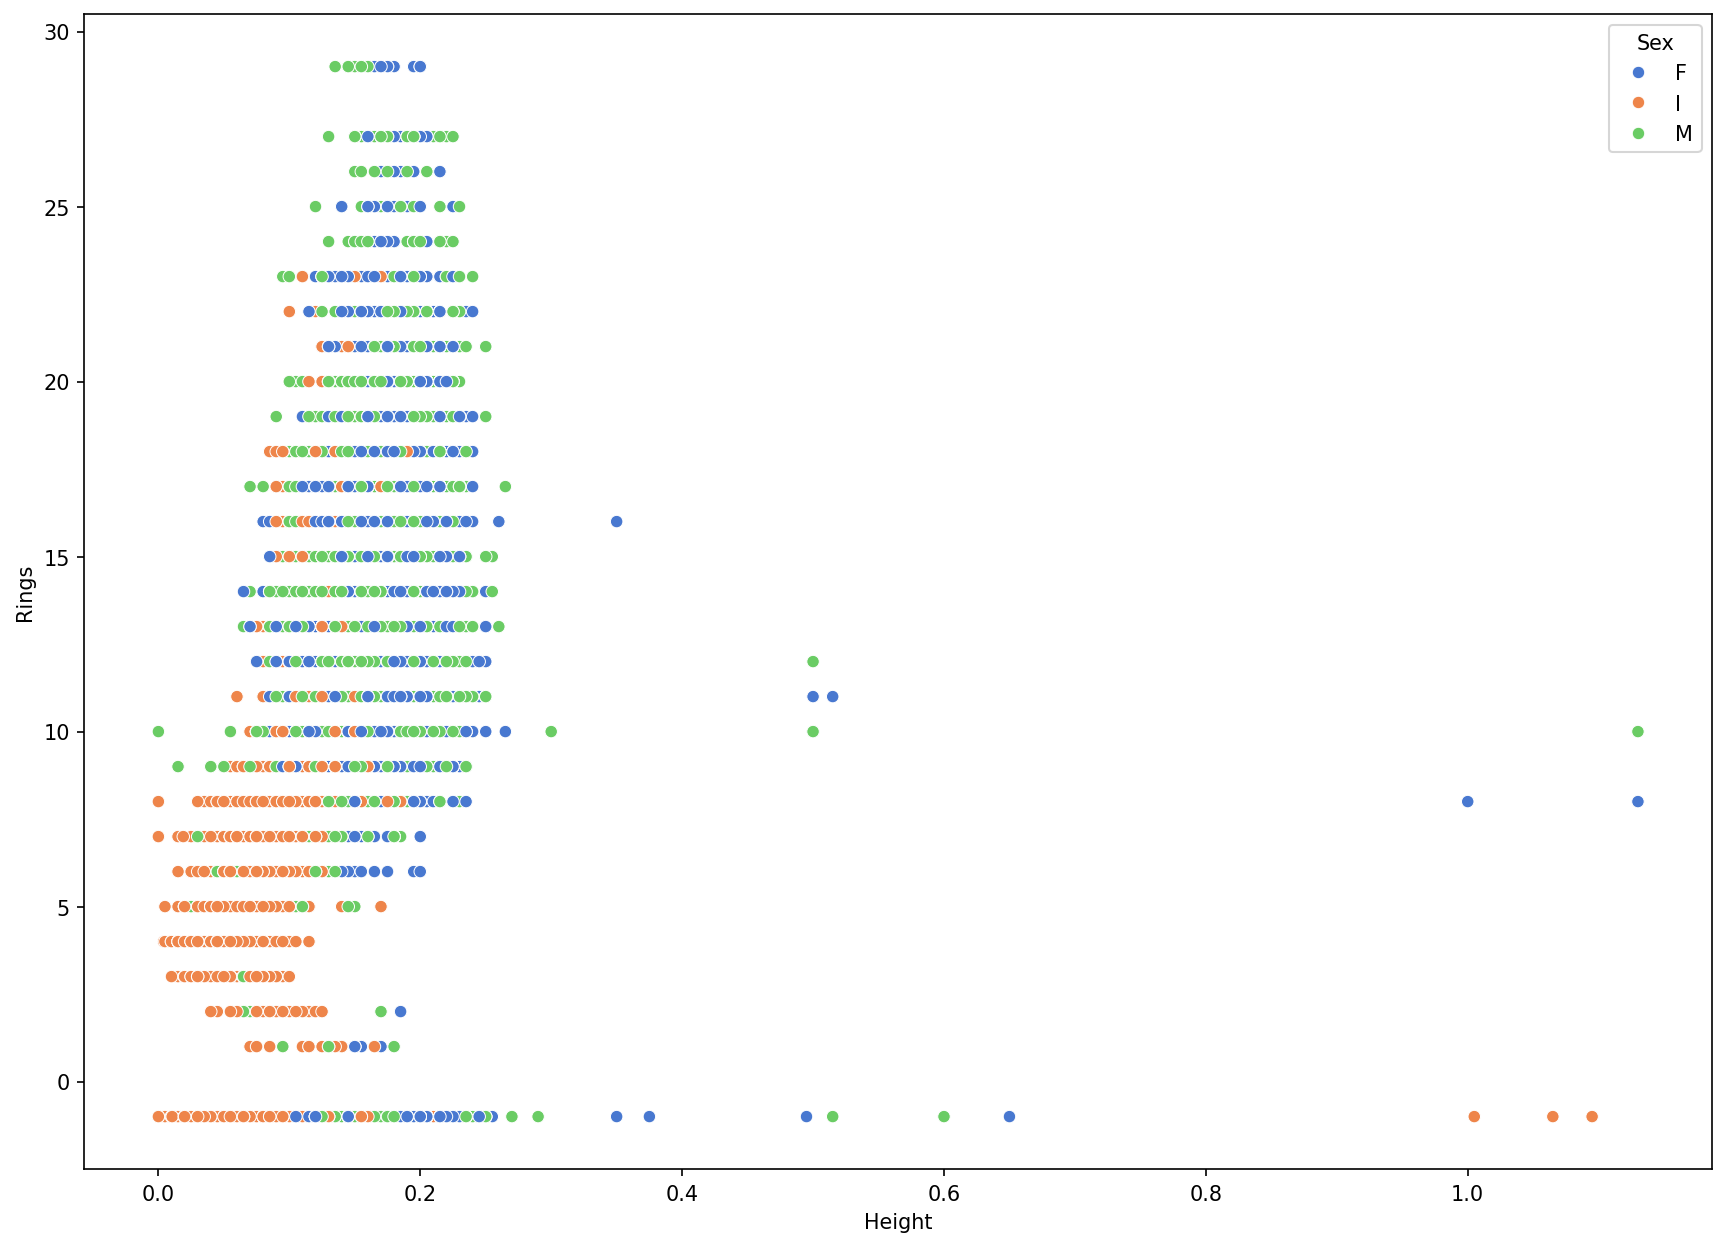

In [21]:
plt.figure(figsize=(14,10), dpi=150)
sns.scatterplot(x=df['Height'],y=df['Rings'],hue=df['Sex'], palette='muted')

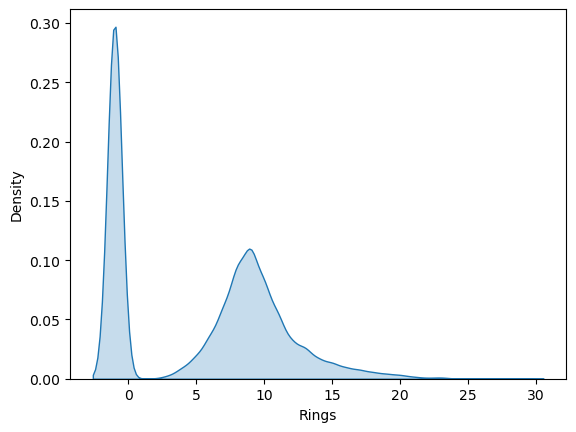

In [22]:
sns.kdeplot(df["Rings"], fill=True);

<Axes: >

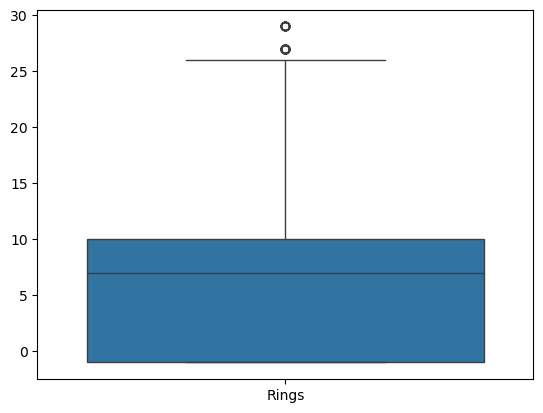

In [23]:
sns.boxplot([df['Rings']])  

## Feature Engineering 

In [24]:
# Shell Volume
df['Shell Volume'] = df['Length'] * df['Diameter'] * df['Height']

In [25]:
# Meat Ratio
df['Meat Ratio'] = df['Whole weight'] / df['Shell weight']

In [26]:
# Body Mass Index (BMI)
df['BMI'] = df['Whole weight'] / (df['Length'] ** 2)

In [27]:
# Shell Surface Area (assuming cylindrical shell)
df['Shell Surface Area'] = 2 * (df['Length'] * df['Diameter'] + df['Length'] * df['Height'] + df['Diameter'] * df['Height'])

In [28]:
# Volume to Weight Ratio
df['Volume to Weight Ratio'] = df['Shell Volume'] / df['Whole weight.1']

In [29]:
#Shell Weight to Length Ratio
df['Shell Weight to Length Ratio'] = df['Shell weight'] / df['Length']

In [30]:
# Meat Weight to Length Ratio
df['Meat Weight to Length Ratio'] = df['Whole weight'] / df['Length']

<Axes: xlabel='Rings'>

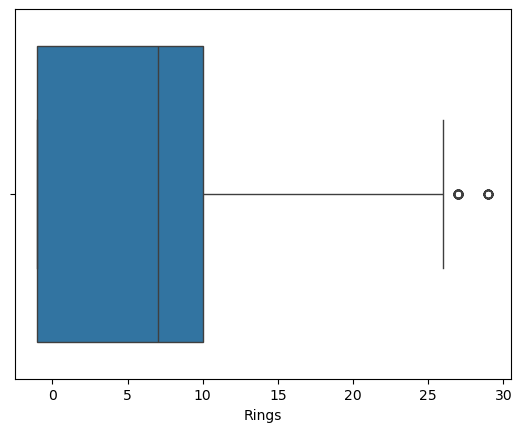

In [31]:
sns.boxplot(x=df["Rings"])

<Axes: xlabel='Length'>

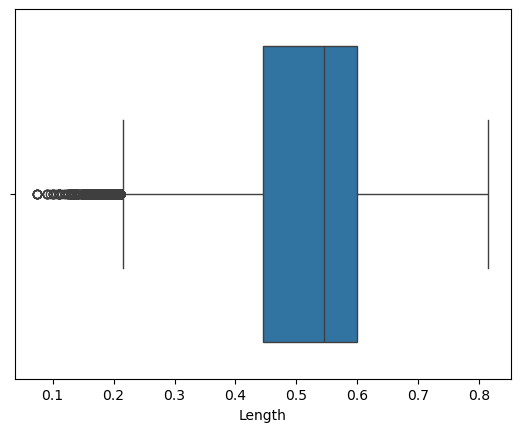

In [32]:
sns.boxplot(x=df["Length"])

<Axes: xlabel='Diameter'>

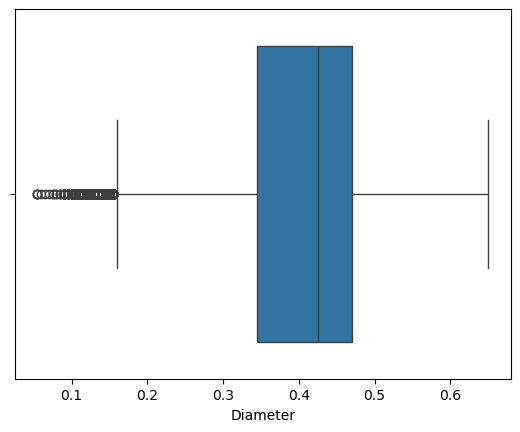

In [33]:
sns.boxplot(x=df["Diameter"])

In [34]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings', 'is_train', 'Shell Volume',
       'Meat Ratio', 'BMI', 'Shell Surface Area', 'Volume to Weight Ratio',
       'Shell Weight to Length Ratio', 'Meat Weight to Length Ratio'],
      dtype='object')

In [37]:
df.shape

(151026, 17)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
numeric_cols = df.select_dtypes(include="number").columns.difference(["Rings","is_train"])

In [40]:
scaler = StandardScaler().fit(df.loc[df["is_train"] == 1, numeric_cols])

In [41]:
df.loc[:, numeric_cols] = scaler.transform(df.loc[:, numeric_cols])

In [42]:
df = pd.get_dummies(df, columns=["Sex"], drop_first=False) 

In [43]:
abs(df.corr(numeric_only=True)['Rings'].sort_values(ascending=False)) 

Rings                           1.000000
is_train                        0.905203
Shell Weight to Length Ratio    0.239767
Shell weight                    0.228199
Height                          0.215434
BMI                             0.211541
Meat Weight to Length Ratio     0.210717
Shell Surface Area              0.209121
Diameter                        0.208834
Length                          0.204525
Shell Volume                    0.204219
Whole weight                    0.202217
Whole weight.2                  0.194032
Whole weight.1                  0.168648
Sex_F                           0.102228
Volume to Weight Ratio          0.095945
Sex_M                           0.077470
Meat Ratio                      0.058428
Sex_I                           0.172660
Name: Rings, dtype: float64

## Modelling 

In [44]:
train = df[df["is_train"]==1].copy()
test  = df[df["is_train"]==0].copy()

In [45]:
print(train.shape)
print(test.shape)

(90615, 19)
(60411, 19)


In [46]:
train.drop(columns=["is_train"], inplace=True)
test.drop(columns=["is_train"], inplace=True)

In [47]:
x = train.drop(columns=["Rings"])
y = train["Rings"]

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
from xgboost import XGBRegressor
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_log_error

In [51]:
model = XGBRegressor(
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    tree_method="hist",
    n_jobs=-1,
    eval_metric="rmse"   
)

In [52]:
try:
    model.fit(
        x_train, np.log1p(y_train),
        eval_set=[(x_test, np.log1p(y_test))],
        early_stopping_rounds=100,
        verbose=False
    )
except TypeError:
    
    model.fit(x_train, np.log1p(y_train), verbose=False)

In [53]:
val_pred = np.expm1(model.predict(x_test))

In [54]:
val_pred = np.maximum(val_pred, 0)

In [55]:
rmsle = np.sqrt(mean_squared_log_error(y_test, val_pred))

In [56]:
print(f"Valid RMSLE: {rmsle:.4f}")

Valid RMSLE: 0.1512


## Submission

In [57]:
# Test özellikleri (eğitimdeki X kolonları ile hizala)
te_d = test[x.columns].copy()

In [58]:
# ID'leri test setinin mevcut index’iyle hizala (outlier/concat sonrası güvenli)
ids = test_id.loc[test.index] if hasattr(test_id, "loc") else test_id

In [59]:
# Tahmin (log1p ile eğittiğin için geri çevir + negatifleri sıfırla)
test_pred = np.expm1(model.predict(te_d))
test_pred = np.maximum(test_pred, 0)

In [60]:
# Submission DF ve kaydetme
submission_df = pd.DataFrame({"id": ids, "Rings": test_pred})
submission_df.to_csv("submission_XGB.csv", index=False)
print("Submission File Saved")

Submission File Saved


## Conclusion

- **Objective:** Predict *Rings* (age) for the Abalone dataset.  
- **Pipeline:** Shared preprocessing (no leakage) — **StandardScaler** for numeric features, **one-hot** for `Sex`, target transformed with **`log1p`**; model: **XGBoost Regressor** with early stopping.  
- **Results:** **Validation RMSLE ≈ 0.1512**, **Kaggle Public ≈ 0.1487** (Private similar).  
- **Key features:** Size measures (**Length, Diameter, Height**) and weight features/ratios.  
- **Submission note:** No row deletion on test; outliers handled via **clipping**, ensuring consistent submission length.

<img  src="score.png" width="800">

In [62]:
# (model: XGBRegressor, scaler: StandardScaler, x: eğitimde kullandığın feature DataFrame)
from joblib import dump

artifacts = {
    "model": model,                          # eğitilmiş XGBRegressor
    "scaler": scaler,                        # fit edilmiş StandardScaler (sayısallar için)
    "feature_cols": list(x.columns),         # eğitimdeki sütun sırası (Sex_* dahil)
    "numeric_cols": list(numeric_cols),      # ölçeklenen sayısal sütunlar
    "sex_levels": ["F", "I", "M"]            # one-hot üretirken kullanılacak seviyeler
}

dump(artifacts, "abalone_xgb_artifacts.joblib")
print("Kaydedildi: abalone_xgb_artifacts.joblib")


Kaydedildi: abalone_xgb_artifacts.joblib
